## Prediksi Pemesanan Hotel

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%matplotlib inline
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


#### Melihat 5 baris teratas dari *datasets*

In [2]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Memindahkan beberapa kolom dari *datasets* ke tabel baru

In [3]:
newTable = df[['hotel','lead_time','adults','deposit_type','customer_type']].copy()
newTable.head()

,hotel,lead_time,adults,deposit_type,customer_type
0,Resort Hotel,342,2,No Deposit,Transient
1,Resort Hotel,737,2,No Deposit,Transient
2,Resort Hotel,7,1,No Deposit,Transient
3,Resort Hotel,13,1,No Deposit,Transient
4,Resort Hotel,14,2,No Deposit,Transient


#### Melihat tipe dan jumlah dari kolom-kolom

In [4]:
newTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   hotel          119390 non-null  object
 1   lead_time      119390 non-null  int64 
 2   adults         119390 non-null  int64 
 3   deposit_type   119390 non-null  object
 4   customer_type  119390 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


#### Membuat *catplot* untuk melihat jumlah pemesanan `hotel` dibedakan dengan `customer_type`

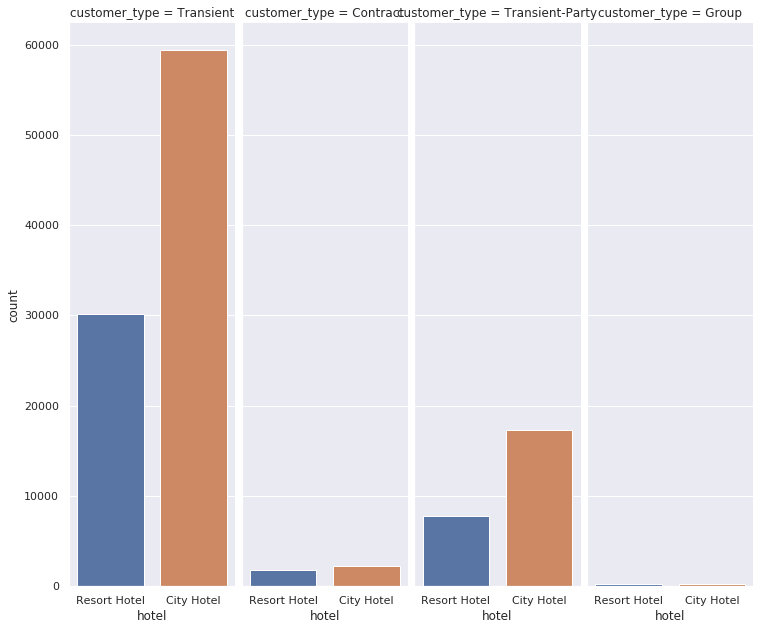

In [5]:
g = sns.catplot(x='hotel', col='customer_type', kind='count', data=newTable);
g.fig.set_figwidth(10)
g.fig.set_figheight(10)

#### Melihat semua nilai dari kolom untuk diubah ke bentuk angka 

In [6]:
print(newTable.customer_type.value_counts())
print(newTable.deposit_type.value_counts())
print(newTable.hotel.value_counts())

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64
No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


#### Melihat deskripsi statistik dari tabel

In [7]:
cust = {'Transient': 1,'Transient-Party': 2,'Contract':3,'Group':4}
depo = {'No Deposit': 1,'Non Refund': 2,'Refundable':3} 
hot = {'City Hotel': 1,'Resort Hotel': 2}

newTable.customer_type = [cust[item] for item in newTable.customer_type]
newTable.deposit_type = [depo[item] for item in newTable.deposit_type]
newTable.hotel = [hot[item] for item in newTable.hotel]

newTable.describe()


,hotel,lead_time,adults,deposit_type,customer_type
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,1.335539,104.011416,1.856403,1.124893,1.293216
std,0.472181,106.863097,0.579261,0.334678,0.551834
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,18.000000,2.000000,1.000000,1.000000
50%,1.000000,69.000000,2.000000,1.000000,1.000000
75%,2.000000,160.000000,2.000000,1.000000,1.000000
max,2.000000,737.000000,55.000000,3.000000,4.000000


#### Membuat stripplot relasi `hotel` dengan `customer_type`

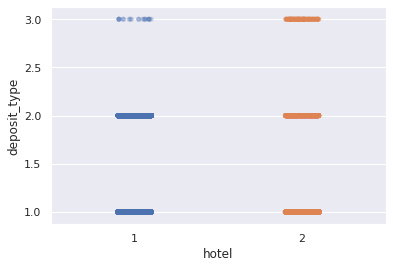

In [8]:
sns.stripplot(x='hotel', y='deposit_type', data=newTable, alpha=0.3, jitter=True);

#### Menampilkan *plotting* relasi untuk semua data 

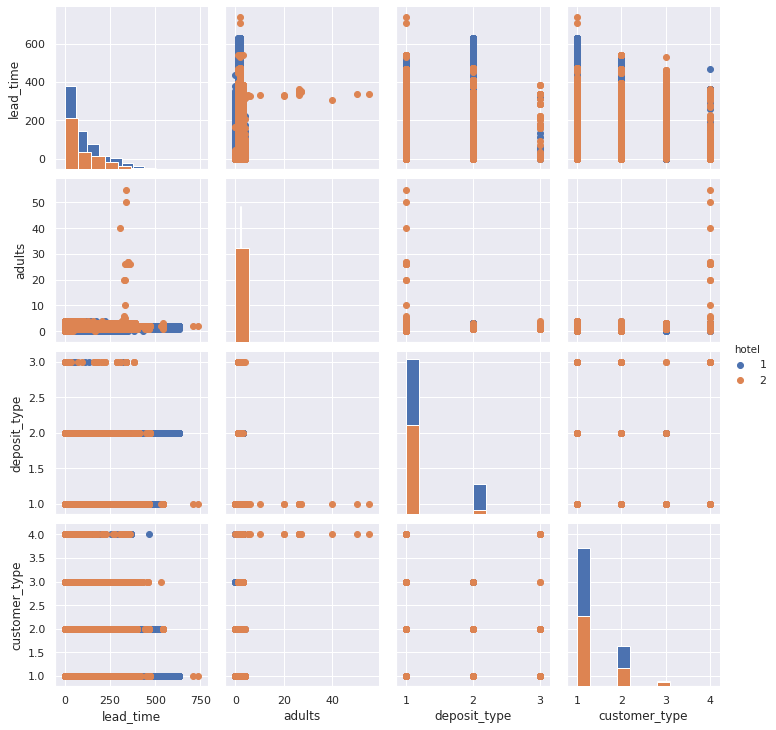

In [9]:
g = sns.PairGrid(newTable, hue="hotel")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

#### Menggunakan prediksi train split

In [10]:
y = newTable.hotel
x = newTable.drop('hotel',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,lead_time,adults,deposit_type,customer_type
9749,72,2,1,1
24807,63,2,1,1
23492,6,2,1,1
69573,189,2,2,1
38178,106,2,1,1


#### Membentuk regresi linear dan memprediksi hasilnya

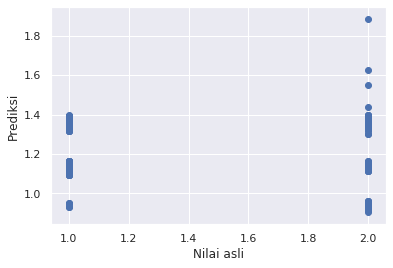

In [11]:
model = LinearRegression().fit(x_train,y_train)
predictions = model.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Nilai asli')
plt.ylabel('Prediksi')
plt.show()

#### Melihat akurasi prediksi *train split* dengan *KNeighborsClassifier*

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.6677276153781724
